In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [173]:
custSegDF = pd.read_csv('Train.csv')
new_Data_test = pd.read_csv('Test.csv')

In [320]:
# new_Data_test.info()

In [175]:
missing_values = custSegDF.isnull().sum()/custSegDF.shape[0]*100
missing_values = missing_values.apply(lambda x: f"{x:.2f}%")
missing_values

ID                  0.00%
Gender              0.00%
Ever_Married        1.74%
Age                 0.00%
Graduated           0.97%
Profession          1.54%
Work_Experience    10.28%
Spending_Score      0.00%
Family_Size         4.15%
Var_1               0.94%
Segmentation        0.00%
dtype: object

In [177]:
custSegDF['Graduated'] = custSegDF['Graduated'].fillna(custSegDF['Graduated'].mode()[0])
custSegDF['Ever_Married'] = custSegDF['Ever_Married'].fillna(custSegDF['Ever_Married'].mode()[0])
custSegDF['Family_Size'] = custSegDF['Family_Size'].fillna(custSegDF['Family_Size'].mode()[0])
custSegDF['Work_Experience'] = custSegDF['Work_Experience'].fillna(custSegDF['Work_Experience'].mode()[0])
custSegDF['Profession'] = custSegDF['Profession'].fillna(custSegDF['Profession'].mode()[0])
custSegDF['Var_1'] = custSegDF['Var_1'].fillna(custSegDF['Var_1'].mode()[0])
custSegDF.sample(5)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
6972,461519,Male,No,35,No,Doctor,1.0,Low,3.0,Cat_4,A
1640,465585,Male,Yes,69,No,Doctor,1.0,Low,1.0,Cat_6,A
1514,460573,Male,No,62,No,Healthcare,8.0,Low,1.0,Cat_3,C
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
6237,465699,Female,No,38,No,Artist,13.0,Low,2.0,Cat_4,D


In [179]:
label_encoder = LabelEncoder()
custSegDF['Profession'] = label_encoder.fit_transform(custSegDF['Profession'])
custSegDF['Gender'] = label_encoder.fit_transform(custSegDF['Gender'])
custSegDF['Ever_Married'] = label_encoder.fit_transform(custSegDF['Ever_Married'])
custSegDF['Spending_Score'] = label_encoder.fit_transform(custSegDF['Spending_Score'])
custSegDF['Graduated'] = label_encoder.fit_transform(custSegDF['Graduated'])
custSegDF['Var_1'] = label_encoder.fit_transform(custSegDF['Var_1'])


In [181]:
missing_values = custSegDF.isnull().sum()/custSegDF.shape[0]*100
missing_values = missing_values.apply(lambda x: f"{x:.2f}%")
print(missing_values)
print(custSegDF.info())

ID                 0.00%
Gender             0.00%
Ever_Married       0.00%
Age                0.00%
Graduated          0.00%
Profession         0.00%
Work_Experience    0.00%
Spending_Score     0.00%
Family_Size        0.00%
Var_1              0.00%
Segmentation       0.00%
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   int32  
 2   Ever_Married     8068 non-null   int32  
 3   Age              8068 non-null   int64  
 4   Graduated        8068 non-null   int32  
 5   Profession       8068 non-null   int32  
 6   Work_Experience  8068 non-null   float64
 7   Spending_Score   8068 non-null   int32  
 8   Family_Size      8068 non-null   float64
 9   Var_1            8068 non-null   int32  
 10  Segmentation     8068 non-null   object 
dtypes

### =====================================================

In [183]:
custSegDF.sample(5)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
2468,460094,0,0,39,1,0,0.0,2,1.0,2,A
547,465122,0,1,40,1,0,2.0,0,2.0,5,C
2910,463863,1,1,35,1,0,0.0,0,2.0,5,C
7113,464606,1,1,41,1,0,1.0,0,2.0,5,C
2400,465779,0,0,19,0,5,0.0,2,5.0,1,D


<Axes: >

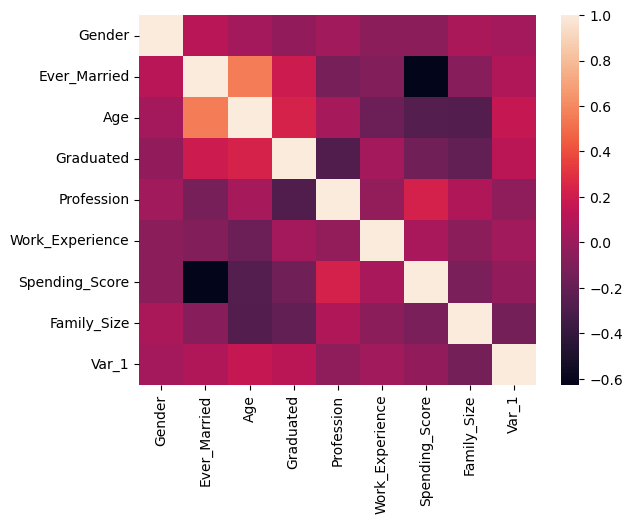

In [185]:
segDF=custSegDF.drop(columns=['Segmentation','ID'])
sns.heatmap(segDF.corr())

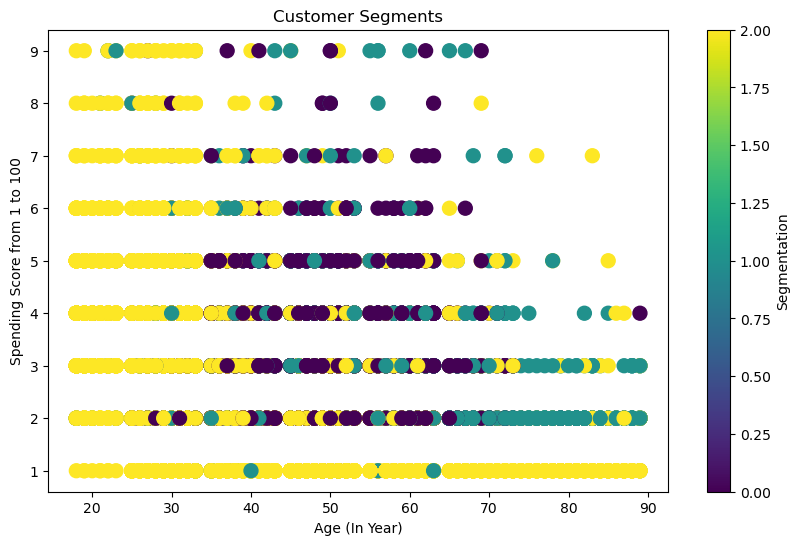

In [156]:
# Plot the customer segments
plt.figure(figsize=(10, 6))
plt.scatter(segDF['Age'],segDF['Family_Size'], c=segDF['Spending_Score'], cmap='viridis', s=100)

# Add labels and title
plt.title('Customer Segments')
plt.xlabel('Age (In Year)')
plt.ylabel('Spending Score from 1 to 100')
plt.colorbar(label='Segmentation')
plt.show()

In [187]:
sc=StandardScaler()
segDF_scaled=sc.fit_transform(segDF)

In [189]:
pc = PCA(n_components=9)
pc.fit(segDF_scaled)

#The amount of variance that each PC explains
var= pc.explained_variance_ratio_

#Cumulative Variance explains
var1=np.cumsum(np.round(pc.explained_variance_ratio_, decimals=4)*100)

In [191]:
var_ratio={}
for n in range(2,9):
    pc=PCA(n_components=n)
    segDF_pca=pc.fit(segDF_scaled)
    var_ratio[n]=sum(segDF_pca.explained_variance_ratio_)

var_ratio

{2: 0.4007488122170063,
 3: 0.5344026173540134,
 4: 0.6440837216723481,
 5: 0.747737651369938,
 6: 0.8440362205511844,
 7: 0.9192551341941342,
 8: 0.9691204017384392}

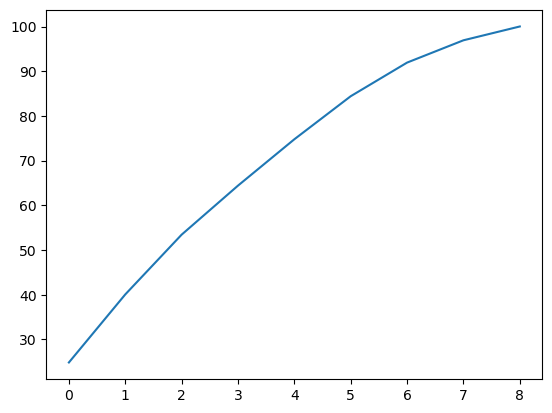

In [193]:
plt.plot(var1)

In [197]:
pc_final=PCA(n_components=6).fit(segDF_scaled)

reduced_cr=pc_final.fit_transform(segDF_scaled)
reduced_cr

array([[ 2.4335543 ,  1.31328407,  0.34265181, -0.43774436, -0.51838752,
         0.33849625],
       [-1.18038908,  0.49814209, -1.21561858,  1.38855662,  0.12220893,
        -0.08120642],
       [-1.39923522, -1.52241242,  1.01630537,  1.03271909, -0.14896967,
        -0.25061608],
       ...,
       [ 0.99330168, -1.71653651,  0.87958093,  0.71256381, -0.29657523,
        -0.51160132],
       [ 1.51271953, -0.55623767,  0.10129595,  0.5132464 , -0.20107371,
        -1.28448952],
       [-1.1546918 ,  1.34481423, -0.37497935, -0.05269049, -0.45228037,
         0.71625349]])

In [105]:
col_list=segDF

In [107]:
col_list

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,1,0,22,0,5,1.0,2,4.0,3
1,0,1,38,1,2,1.0,0,3.0,3
2,0,1,67,1,2,1.0,2,1.0,5
3,1,1,67,1,7,0.0,1,2.0,5
4,0,1,40,1,3,1.0,1,6.0,5
...,...,...,...,...,...,...,...,...,...
8063,1,0,22,0,0,0.0,2,7.0,0
8064,1,0,35,0,4,3.0,2,4.0,3
8065,0,0,33,1,5,1.0,2,1.0,5
8066,0,0,27,1,5,1.0,2,4.0,5


In [109]:
Loadings =  pd.DataFrame((pc_final.components_.T * np.sqrt(pc_final.explained_variance_)).T,columns=segDF.columns).T

In [111]:
Loadings

,0,1,2,3,4,5,6,7,8
Gender,-0.105852,0.336651,0.148566,-0.778850,-0.319777,0.378587,0.010054,-0.000623,-0.034924
Ever_Married,-0.840570,0.283843,0.008857,0.031375,0.206527,0.081819,-0.079803,0.020953,0.394690
Age,-0.729231,-0.023302,0.462050,0.155293,0.092362,0.091201,0.060958,0.399336,-0.223972
Graduated,-0.489940,-0.487343,-0.233355,0.010852,-0.248596,0.098679,0.619292,-0.109866,0.029622
Profession,0.325100,0.256740,0.684585,0.052278,0.394498,0.092428,0.354773,-0.258638,0.014166
Work_Experience,0.158016,-0.363326,-0.367093,-0.329400,0.709827,0.278978,0.032160,0.128293,-0.026653
Spending_Score,0.696095,-0.393080,0.343613,-0.012374,-0.207274,0.088105,0.076866,0.343184,0.261594
Family_Size,0.259019,0.678856,-0.345878,-0.071557,0.063071,-0.345416,0.386808,0.272838,0.009172
Var_1,-0.255107,-0.353554,0.267999,-0.488790,0.106470,-0.696614,-0.030329,-0.035980,0.021994


In [203]:
Loadings.to_excel("cLoadings.xlsx")

In [115]:
list_var = ['Gender','Ever_Married','Age','Graduated','Profession','Work_Experience','Spending_Score','Family_Size','Var_1']

In [117]:
segDF_scaled1=pd.DataFrame(segDF_scaled, columns=segDF.columns)
segDF_scaled1.head(5)

segDF_scaled2=segDF_scaled1[list_var]
segDF_scaled2.head(5)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,0.909164,-1.206653,-1.284623,-1.29219,0.886607,-0.451136,0.754462,0.785536,-0.808370
1,-1.099912,0.828738,-0.327151,0.77388,-0.293910,-0.451136,-1.603013,0.122735,-0.808370
2,-1.099912,0.828738,1.408268,0.77388,-0.293910,-0.451136,0.754462,-1.202868,0.600711
3,0.909164,0.828738,1.408268,0.77388,1.673618,-0.757410,-0.424275,-0.540066,0.600711
4,-1.099912,0.828738,-0.207467,0.77388,0.099596,-0.451136,-0.424275,2.111139,0.600711


In [119]:
km_3=KMeans(n_clusters=3,random_state=123)

In [121]:
km_3.fit(segDF_scaled2)

KMeans(n_clusters=3, random_state=123)

In [123]:
pd.Series(km_3.labels_).value_counts()

1    3998
0    2071
2    1999
Name: count, dtype: int64

In [125]:
km_4=KMeans(n_clusters=4,random_state=123).fit(segDF_scaled2)
#km_5.labels_a

km_5=KMeans(n_clusters=5,random_state=123).fit(segDF_scaled2)
#km_5.labels_

km_6=KMeans(n_clusters=6,random_state=123).fit(segDF_scaled2)
#km_6.labels_

km_7=KMeans(n_clusters=7,random_state=123).fit(segDF_scaled2)
#km_7.labels_

km_8=KMeans(n_clusters=8,random_state=123).fit(segDF_scaled2)
#km_5.labels_

In [127]:
segDF['cluster_3'] = km_3.labels_
segDF['cluster_4'] = km_4.labels_
segDF['cluster_5'] = km_5.labels_
segDF['cluster_6'] = km_6.labels_
segDF['cluster_7'] = km_7.labels_
segDF['cluster_8'] = km_8.labels_

In [129]:
segDF.head(5)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8
0,1,0,22,0,5,1.0,2,4.0,3,2,2,2,2,2,2
1,0,1,38,1,2,1.0,0,3.0,3,1,3,3,3,3,4
2,0,1,67,1,2,1.0,2,1.0,5,1,1,1,5,6,7
3,1,1,67,1,7,0.0,1,2.0,5,1,1,1,1,1,1
4,0,1,40,1,3,1.0,1,6.0,5,1,3,4,4,4,5


In [131]:
size=pd.concat([
                pd.Series(segDF.cluster_3.size), 
                pd.Series.sort_index(segDF.cluster_3.value_counts()), 
                pd.Series.sort_index(segDF.cluster_4.value_counts()),
                pd.Series.sort_index(segDF.cluster_5.value_counts()),
                pd.Series.sort_index(segDF.cluster_6.value_counts()),
                pd.Series.sort_index(segDF.cluster_7.value_counts()),
                pd.Series.sort_index(segDF.cluster_8.value_counts())])


In [230]:
# size

In [133]:
Seg_size=pd.DataFrame(size, columns=['Seg_size'])
Seg_Pct = pd.DataFrame(size/segDF.cluster_3.size, columns=['Seg_Pct'])
Seg_size.T

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
Seg_size,8068,2071,3998,1999,2275,1233,2029,2531,2038,1087,...,1010,1047,912,876,1005,819,862,1587,1038,969


In [135]:
Seg_Pct.T

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
Seg_Pct,1.0,0.256693,0.495538,0.247769,0.281978,0.152826,0.251487,0.313708,0.252603,0.13473,...,0.125186,0.129772,0.113039,0.108577,0.124566,0.101512,0.106842,0.196703,0.128656,0.120104


### =====================================================

In [96]:
custSegDF.isnull().sum()

ID                   0
Gender               0
Ever_Married         0
Age                  0
Graduated            0
Profession           0
Work_Experience    829
Spending_Score       0
Family_Size          0
Var_1                0
Segmentation         0
dtype: int64

In [161]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
features = custSegDF[['Ever_Married','Age','Graduated','Work_Experience','Gender','Spending_Score','Family_Size']]
# features = new_custSegDF[['Age','Spending_Score']]
# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
# Determine the optimal number of clusters using the elbow method
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

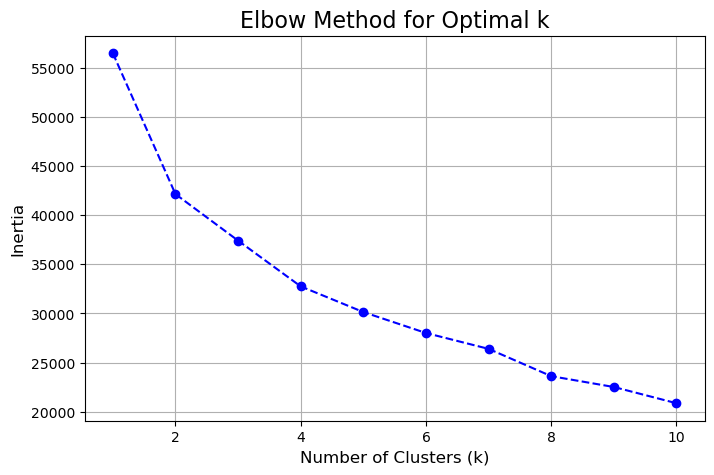

In [163]:
# Plot the elbow graph
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='--', color='b')
plt.title('Elbow Method for Optimal k', fontsize=16)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.grid(True)
plt.show()

In [165]:
optimal_k =2
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
custSegDF['Segmentation'] = kmeans.fit_predict(scaled_features)

In [167]:
custSegDF

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,1,0,22,0,5,1.0,2,4.0,3,0
1,462643,0,1,38,1,2,1.0,0,3.0,3,1
2,466315,0,1,67,1,2,1.0,2,1.0,5,1
3,461735,1,1,67,1,7,0.0,1,2.0,5,1
4,462669,0,1,40,1,3,1.0,1,6.0,5,1
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,1,0,22,0,0,0.0,2,7.0,0,0
8064,464685,1,0,35,0,4,3.0,2,4.0,3,0
8065,465406,0,0,33,1,5,1.0,2,1.0,5,0
8066,467299,0,0,27,1,5,1.0,2,4.0,5,0


<Axes: xlabel='Age', ylabel='Spending_Score'>

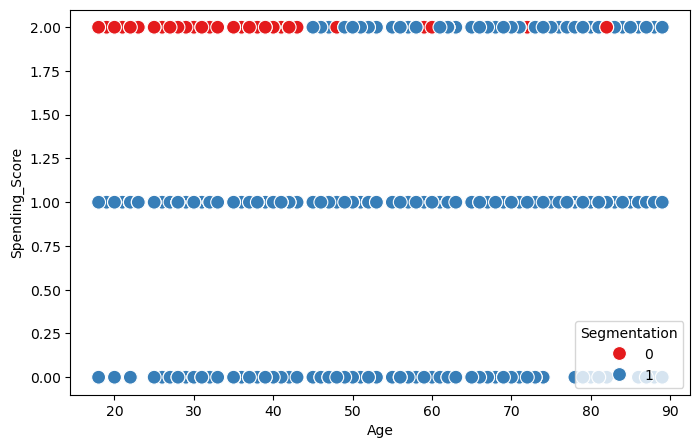

In [169]:
# Visualize the clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x=custSegDF['Age'],
    y=custSegDF['Spending_Score'],
    hue=custSegDF['Segmentation'],
    palette='Set1',
    s=100
)

In [488]:
# plt.figure(figsize=(8, 5))
# sns.scatterplot(
#     x=new_custSegDF['Family_Size'],
#     y=new_custSegDF['Spending_Score'],
#     hue=new_custSegDF['Segmentation'],
#     palette='Set1',
#     s=100
# )

In [438]:
# Display the clustered data
print("\nClustered Data:")
print(new_custSegDF.sample(10))


Clustered Data:
          ID  Gender  Ever_Married  Age  Graduated     Profession  \
5271  463892       1           0.0   38        1.0         Artist   
7256  466962       1           1.0   48        1.0         Artist   
5655  460681       0           0.0   36        1.0      Homemaker   
53    462960       0           1.0   57        1.0  Entertainment   
4022  465600       1           1.0   40        1.0       Engineer   
4565  463170       0           1.0   33        1.0     Healthcare   
1636  464021       0           0.0   18        0.0     Healthcare   
2474  461556       0           1.0   49        1.0       Engineer   
1929  464663       1           1.0   73        0.0      Executive   
5672  467132       0           1.0   66        1.0       Engineer   

      Work_Experience  Spending_Score  Family_Size  Var_1  Segmentation  
5271              9.0              19          1.0  Cat_6             2  
7256              8.0              32          2.0  Cat_6             0  
5

In [382]:
new_custSegDF.keys()

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

In [476]:
# X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]+
X = new_custSegDF[['Family_Size','Spending_Score','Family_Size']]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Check the scaled data
# print(X_scaled)

In [478]:
#KMeans Clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
new_custSegDF['Segmentation'] = kmeans.fit_predict(X_scaled)
print(new_custSegDF[['ID', 'Segmentation']])

          ID  Segmentation
0     462809             1
1     462643             1
2     466315             2
3     461735             0
4     462669             3
...      ...           ...
8063  464018             3
8064  464685             1
8065  465406             2
8066  467299             1
8067  461879             0

[8068 rows x 2 columns]


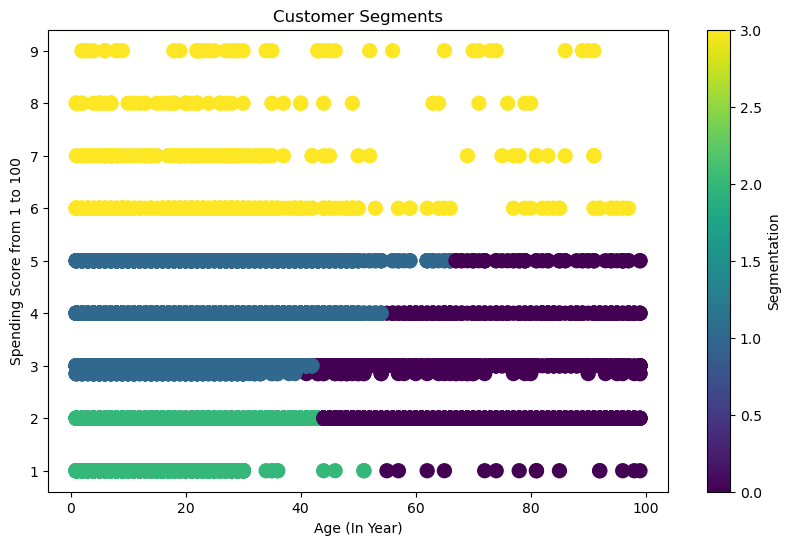

In [482]:
# Plot the customer segments
plt.figure(figsize=(10, 6))
plt.scatter(new_custSegDF['Spending_Score'],new_custSegDF['Family_Size'], c=new_custSegDF['Segmentation'], cmap='viridis', s=100)

# Add labels and title
plt.title('Customer Segments')
plt.xlabel('Age (In Year)')
plt.ylabel('Spending Score from 1 to 100')
plt.colorbar(label='Segmentation')
plt.show()

In [446]:
# Display the clustered data
print("\nClustered Data:")
print(new_custSegDF.sample(10))


Clustered Data:
          ID  Gender  Ever_Married  Age  Graduated     Profession  \
1904  462639       0           1.0   43        0.0       Engineer   
4581  464372       1           1.0   45        1.0         Artist   
3180  465554       0           0.0   85        1.0         Lawyer   
4629  464986       1           1.0   67        0.0         Lawyer   
7780  459170       0           0.0   36        1.0         Artist   
8037  466629       1           0.0   28        0.0     Healthcare   
5735  460305       0           1.0   49        1.0  Entertainment   
6336  461692       0           1.0   87        0.0         Artist   
4378  460632       0           0.0   22        0.0     Healthcare   
3628  462453       1           0.0   22        0.0     Healthcare   

      Work_Experience  Spending_Score  Family_Size  Var_1  Segmentation  
1904         2.633712              45          2.0  Cat_4             0  
4581         1.000000              42          6.0  Cat_5             1  
3